In [104]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Importing dataset
data = pd.read_csv("marketing_campaign.csv", sep= "\t")
data.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [105]:
##-------- CLEANING & MANIPULATING THE DATA -------##

# Dropping unrequired columns 
data = data.drop(columns = ["ID","Recency", "NumWebVisitsMonth", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", 
          "AcceptedCmp1", "AcceptedCmp2", "Z_CostContact", "Z_Revenue",
          "Response"])


# Adding extra features for total number of kids, has kids, total spent & age when a customer

data["Num_children"] = data["Kidhome"] + data["Teenhome"]

data["Has_children"] = data.apply(lambda x : 1 if x["Num_children"] > 0 else 0, axis=1 )

data["Total_spend"] = data["MntFishProducts"] + data["MntFruits"] + \
data["MntGoldProds"] + data["MntMeatProducts"] + data["MntSweetProducts"] + \
data["MntWines"]

data["Dt_Customer"] = data["Dt_Customer"].astype("datetime64[ns]") # Converting to datetime 
data["Age_customer"] = data["Dt_Customer"].dt.year - data["Year_Birth"]

data.head()


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,Num_children,Has_children,Total_spend,Age_customer
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,635,88,546,...,88,3,8,10,4,0,0,0,1617,55
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,11,1,6,...,6,2,1,1,2,0,2,1,27,60
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,426,49,127,...,42,1,8,2,10,0,0,0,776,48
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,11,4,20,...,5,2,2,0,4,0,1,1,53,30
4,1981,PhD,Married,58293.0,1,0,2014-01-19,173,43,118,...,15,5,5,3,6,0,1,1,422,33


In [106]:
# Summary statistics
data.describe()


,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain,Num_children,Has_children,Total_spend,Age_customer
count,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,2013-07-11 22:57:38.571428608,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,0.009375,0.950446,0.715179,605.798214,44.222321
min,1893.000000,1730.000000,0.000000,0.000000,2012-01-08 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,16.000000
25%,1959.000000,35303.000000,0.000000,0.000000,2013-01-19 18:00:00,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,68.750000,36.000000
50%,1970.000000,51381.500000,0.000000,0.000000,2013-07-11 00:00:00,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,0.000000,1.000000,1.000000,396.000000,43.000000
75%,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,0.000000,1.000000,1.000000,1045.500000,54.000000
max,1996.000000,666666.000000,2.000000,2.000000,2014-12-06 00:00:00,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,1.000000,3.000000,1.000000,2525.000000,121.000000
std,11.984069,25173.076661,0.538398,0.544538,NaN,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,0.096391,0.751803,0.451430,602.249288,12.022855


In [107]:
# Find &remove missing values
data.isna().sum()
data = data.dropna()
data.isna().sum()

# Find & remove duplicates
data.duplicated().sum() # No duplicates found so no need to remove any


201

C:\Users\windh\AppData\Local\Temp\ipykernel_16496\1933476171.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(["No","Yes"])
C:\Users\windh\AppData\Local\Temp\ipykernel_16496\1933476171.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[3].set_xticklabels(["No","Yes"])


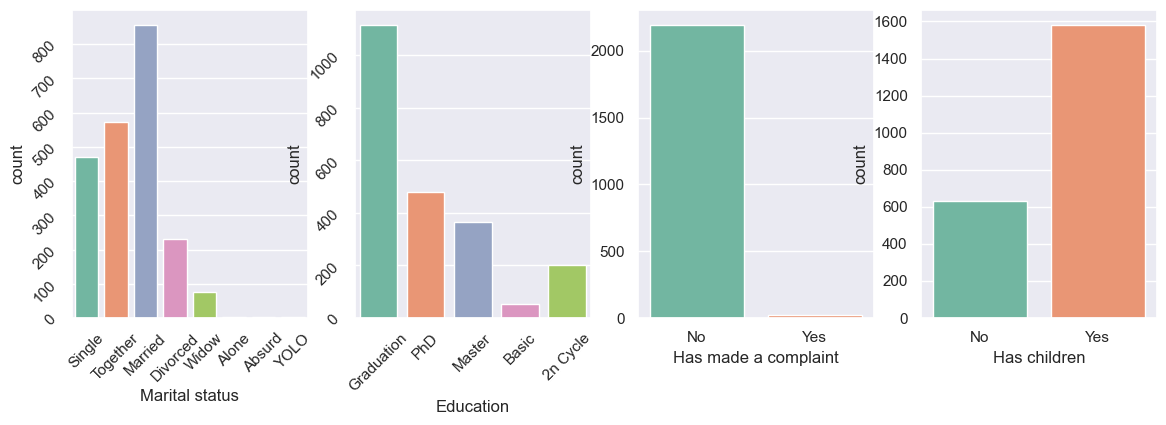

In [108]:
##-------- EXPLORATORY DATA ANALYSIS-------##

# Plotting categorical data
sns.set_theme()
sns.set_palette("Set2")
fig, ax = plt.subplots(1,4, figsize=(14,4))

sns.countplot(data=data, x='Marital_Status', hue='Marital_Status', ax=ax[0])
sns.countplot(data=data, x='Education', hue='Education', ax=ax[1])
sns.countplot(data=data, x='Complain', hue='Complain', ax=ax[2], legend=False)
sns.countplot(data=data, x='Has_children', hue='Has_children', ax=ax[3], legend=False)

# Setting plot parameters 
ax[0].tick_params(rotation=45)
ax[0].set_xlabel("Marital status")

ax[1].tick_params(rotation=45)

ax[2].set_xticklabels(["No","Yes"])
ax[2].set_xlabel("Has made a complaint")

ax[3].set_xticklabels(["No","Yes"])
ax[3].set_xlabel("Has children")

plt.show()


It appears that in the dataset, the most common type of customers are those who are married, have an undergraduate degree, has never made a complaint in two years, and/or has at least one child. There are large gaps between the number of customers' education levels, complaints made and presence of children. However, the gap between customers' marital status are less wide, at least for the three most common marital statuses(Married>Together>Single). 

Also, there appears to be several marital statuses with barely any counts (Alone, Absurd and YOLO), which should probably be treated as outliers and removed

C:\Users\windh\AppData\Local\Temp\ipykernel_16496\3192029501.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(["No","Yes"])
C:\Users\windh\AppData\Local\Temp\ipykernel_16496\3192029501.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[3].set_xticklabels(["No","Yes"])


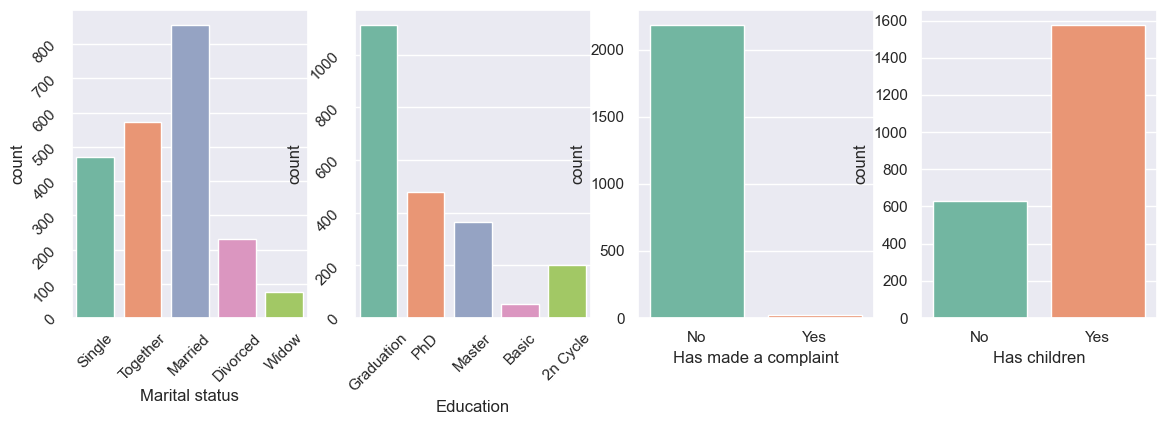

In [109]:
# Dropping datapoints with marital status 'Alone', 'Absurd' and 'YOLO'
data = data.loc[~((data['Marital_Status'] == 'Alone') | (data['Marital_Status']== "Absurd") | (data['Marital_Status']== "YOLO"))]


# Plotting the barplots again without the 'Alone', 'Absurd' and 'YOLO' marital statuses
fig, ax = plt.subplots(1,4, figsize=(14,4))

sns.countplot(data=data, x='Marital_Status', hue='Marital_Status', ax=ax[0])
sns.countplot(data=data, x='Education', hue='Education', ax=ax[1])
sns.countplot(data=data, x='Complain', hue='Complain', ax=ax[2], legend=False)
sns.countplot(data=data, x='Has_children', hue='Has_children', ax=ax[3], legend=False)

# Setting plot parameters 
ax[0].tick_params(rotation=45)
ax[0].set_xlabel("Marital status")

ax[1].tick_params(rotation=45)

ax[2].set_xticklabels(["No","Yes"])
ax[2].set_xlabel("Has made a complaint")

ax[3].set_xticklabels(["No","Yes"])
ax[3].set_xlabel("Has children")

plt.show()

Text(0.5, 0, 'Total spend')

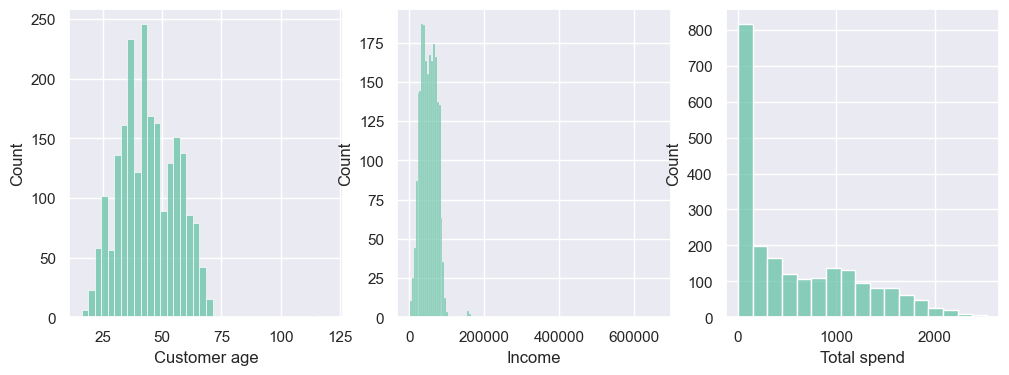

In [110]:
# Plotting histograms for non-categorical data
fig, ax = plt.subplots(1,3, figsize=(12, 4))

sns.histplot(data=data, x="Age_customer", ax=ax[0])
sns.histplot(data=data, x="Income", ax=ax[1])
sns.histplot(data=data, x="Total_spend", ax=ax[2])

# Setting plot parameters
ax[0].set_xlabel("Customer age")
ax[2].set_xlabel("Total spend")


There appear to be outliers in income & age, so we will remove them...

In [111]:
# Removing outliers
data = data[data["Age_customer"]<100]
data = data[data["Income"]<200000]

# Testing that all outliers removed 
(data["Age_customer"]>100).sum() + (data["Income"]>200000).sum()


0

Text(0.5, 0, 'Total spend')

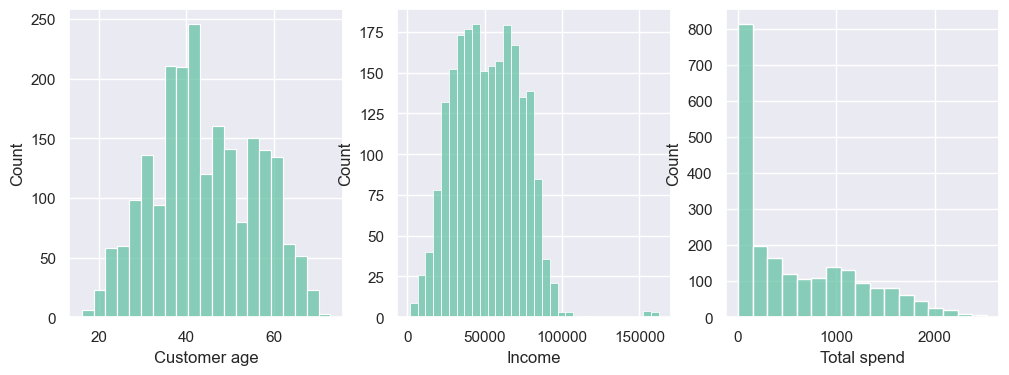

In [112]:
# Plotting data with outliers removed 
fig, ax = plt.subplots(1,3, figsize=(12, 4))

sns.histplot(data=data, x="Age_customer", ax=ax[0])
sns.histplot(data=data, x="Income", ax=ax[1])
sns.histplot(data=data, x="Total_spend", ax=ax[2])

# Setting plot parameters
ax[0].set_xlabel("Customer age")
ax[2].set_xlabel("Total spend")


<Axes: xlabel='Total_spend', ylabel='Density'>

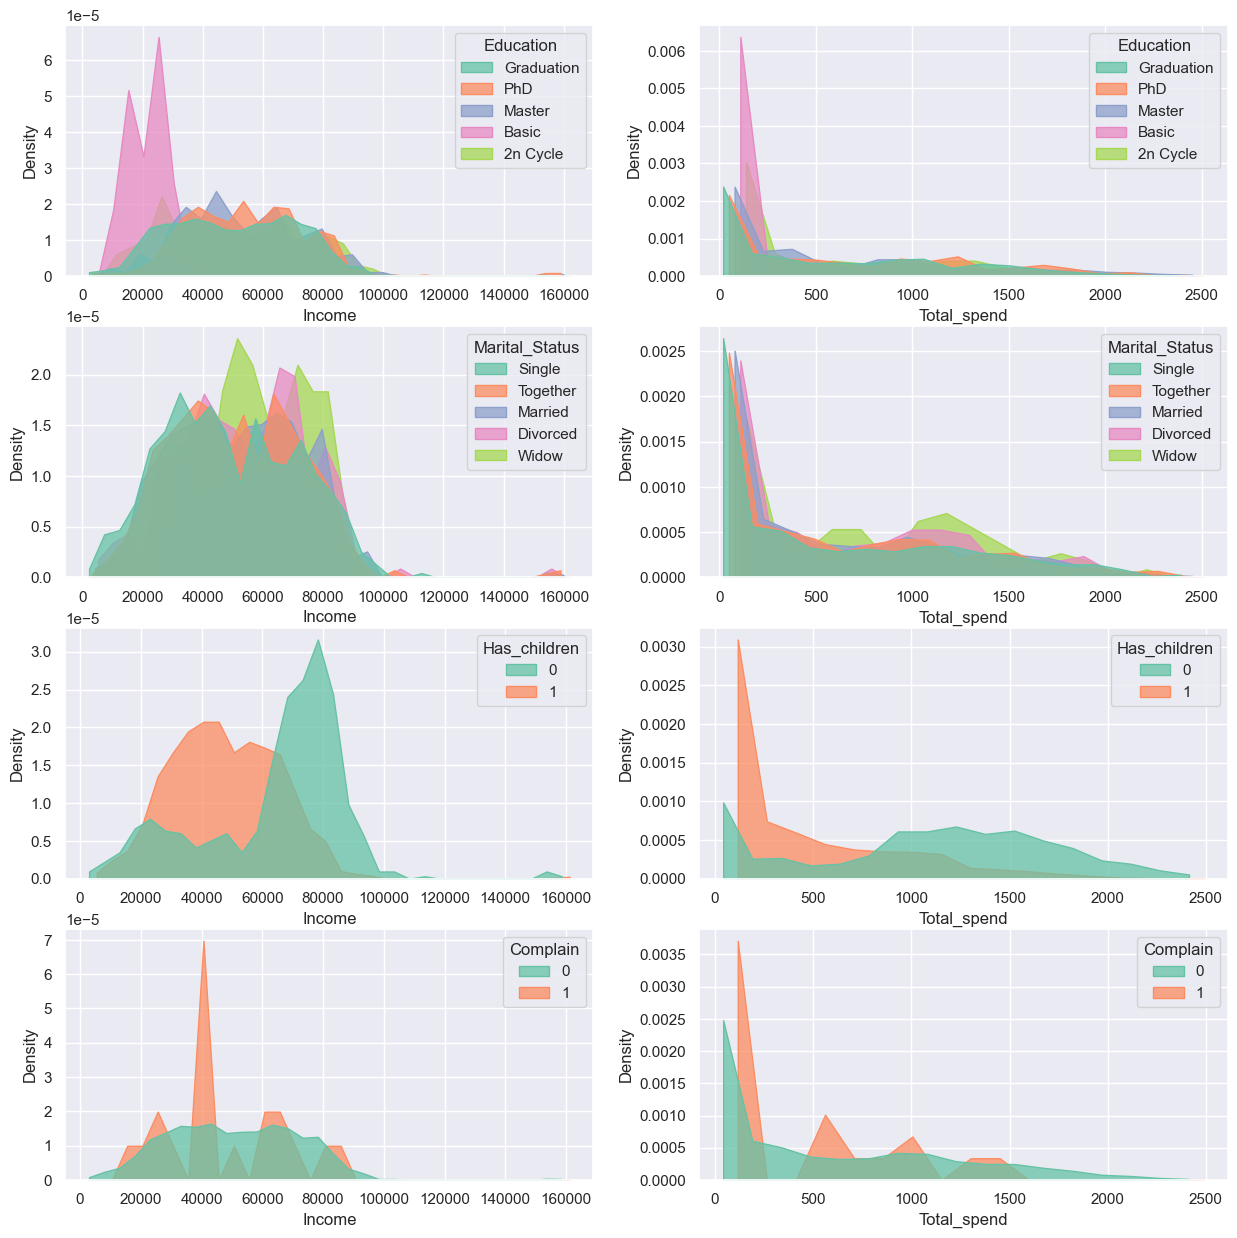

In [113]:
# Density plot to see distribution of income & total spend based on categorical parameters with independent density normalisation
fig, ax = plt.subplots(nrows=4,ncols=2, figsize = (15,15))

sns.histplot(data=data, x="Income", hue="Education", ax=ax[0,0], element="poly",
    stat="density", common_norm=False, multiple="dodge")
sns.histplot(data=data, x="Total_spend", hue="Education", ax=ax[0,1], element="poly",
    stat="density", common_norm=False, multiple="dodge")
sns.histplot(data=data, x="Income", hue="Marital_Status", ax=ax[1,0], element="poly",
    stat="density", common_norm=False, multiple="dodge")
sns.histplot(data=data, x="Total_spend", hue="Marital_Status", ax=ax[1,1], element="poly",
    stat="density", common_norm=False, multiple="dodge")
sns.histplot(data=data, x="Income", hue="Has_children", ax=ax[2,0], element="poly",
    stat="density", common_norm=False, multiple="dodge")
sns.histplot(data=data, x="Total_spend", hue="Has_children", ax=ax[2,1], element="poly",
    stat="density", common_norm=False, multiple="dodge")
sns.histplot(data=data, x="Income", hue="Complain", ax=ax[3,0], element="poly",
    stat="density", common_norm=False, multiple="dodge")
sns.histplot(data=data, x="Total_spend", hue="Complain", ax=ax[3,1], element="poly",
    stat="density", common_norm=False, multiple="dodge")


In terms of education, it appears that customers with basic education overhwelmingly earn less and also spend less, which is to be expected. Customers without children on average also appear to earn and spend more than customers with children. The distributon of income/spending between customer marital statuses appear to be more even, however, widowed/divorced customers appear to earn and spend slightly more compared to customers with other marital statuses. 

Text(0, 0.5, 'Total spend')

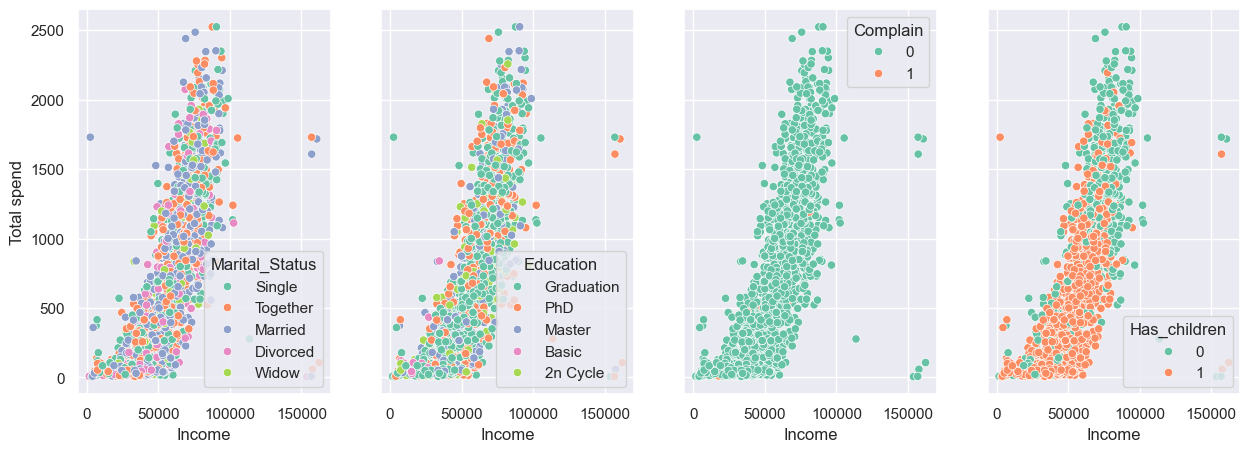

In [114]:
# Seeing relationship between income & total spend based on marital status, education, whether they complain and has children 
fig, ax = plt.subplots(1,4, figsize=(15,5), sharex=True, sharey=True)

sns.scatterplot(data=data, x = "Income", y = "Total_spend", hue = "Marital_Status", ax=ax[0])
sns.scatterplot(data=data, x = "Income", y = "Total_spend", hue = "Education", ax=ax[1])
sns.scatterplot(data=data, x = "Income", y = "Total_spend", hue = "Complain", ax=ax[2])
sns.scatterplot(data=data, x = "Income", y = "Total_spend", hue = "Has_children", ax=ax[3])

# Setting plot parameters
ax[0].set_ylabel("Total spend")


Income and spending appear to be positively correlated (the higher the income, the higheor the spending). However, there doesn't seem to be any obvious groupings with the exception of customers with/without children where customers with children appear to earn less and spend less compared to customers without children. 

<Axes: xlabel='Age_customer', ylabel='Total_spend'>

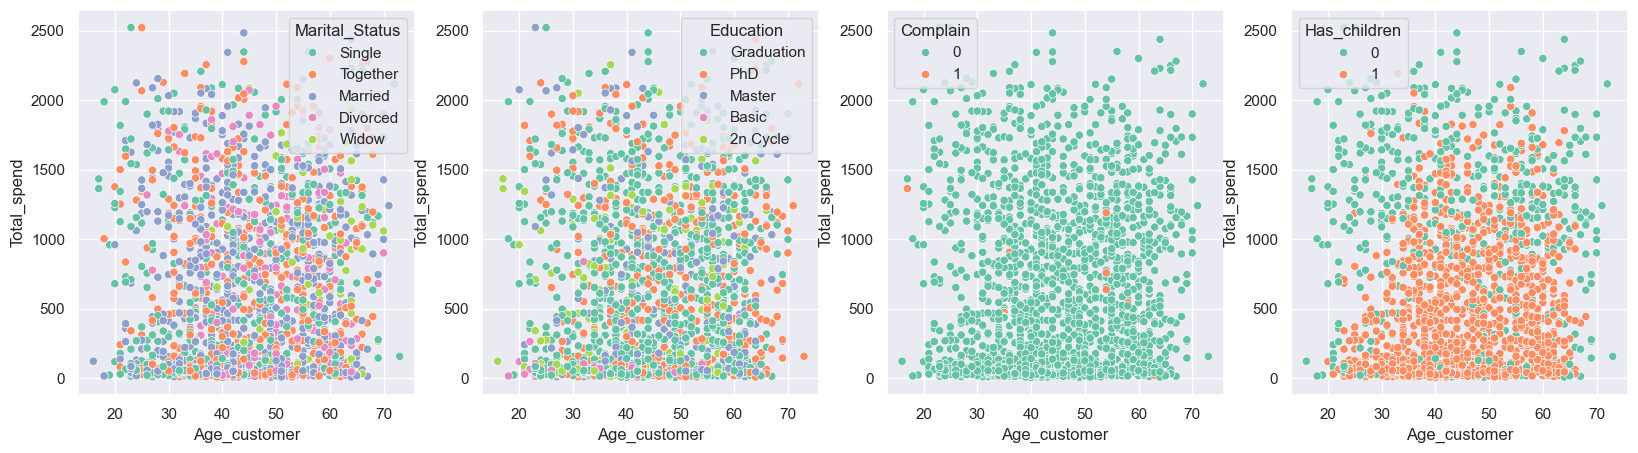

In [115]:
# Seeing relationship between age & total spend based on marital status, education, whether they complain and has children 
fig, ax = plt.subplots(1,4, figsize=(20,5))

sns.scatterplot(data=data, x = "Age_customer", y = "Total_spend", hue = "Marital_Status", ax=ax[0])
sns.scatterplot(data=data, x = "Age_customer", y = "Total_spend", hue = "Education", ax=ax[1])
sns.scatterplot(data=data, x = "Age_customer", y = "Total_spend", hue = "Complain", ax=ax[2])
sns.scatterplot(data=data, x = "Age_customer", y = "Total_spend", hue = "Has_children", ax=ax[3])


There doesn't seem to be any correlation between age and total spend and no obvious groupings. Although customers with children appear to be concentrated near the bottom of the total spend axis, meaning they tend to spend less compared to customers without children. 

<Axes: xlabel='Age_customer', ylabel='Income'>

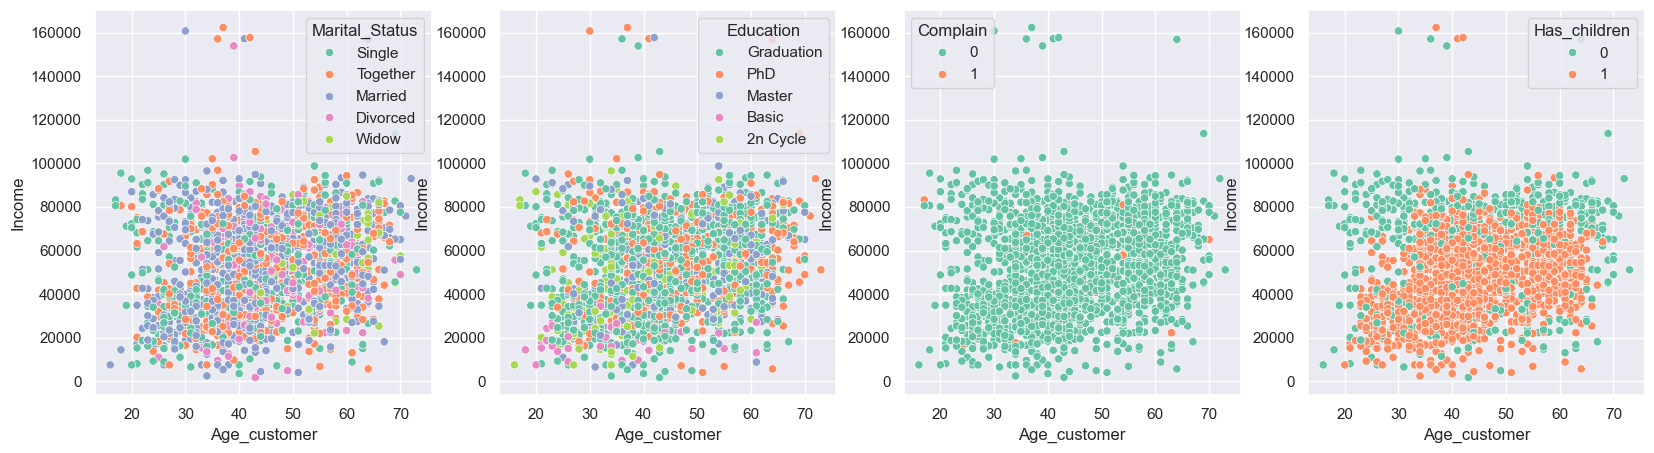

In [116]:
# Seeing relationship between age & income based on marital status, education, whether they complain and has children 
fig, ax = plt.subplots(1,4, figsize=(20,5))

sns.scatterplot(data=data, x = "Age_customer", y = "Income", hue = "Marital_Status", ax=ax[0])
sns.scatterplot(data=data, x = "Age_customer", y = "Income", hue = "Education", ax=ax[1])
sns.scatterplot(data=data, x = "Age_customer", y = "Income", hue = "Complain", ax=ax[2])
sns.scatterplot(data=data, x = "Age_customer", y = "Income", hue = "Has_children", ax=ax[3])


There doesn't seem ot be any correlation between age and income and again, there appear to be no obvious groupings. 